Successfully loaded qc_cellranger_table_.csv


/tmp/ipykernel_1623671/2144515994.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['percentage_yield'] = pd.to_numeric(plot_df['percentage_yield'], errors='coerce')
/tmp/ipykernel_1623671/2144515994.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['fraction_reads_in_cells'] = pd.to_numeric(plot_df['fraction_reads_in_cells'], errors='coerce')
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family

Plot saved as qc_metrics_NK_barplots.png


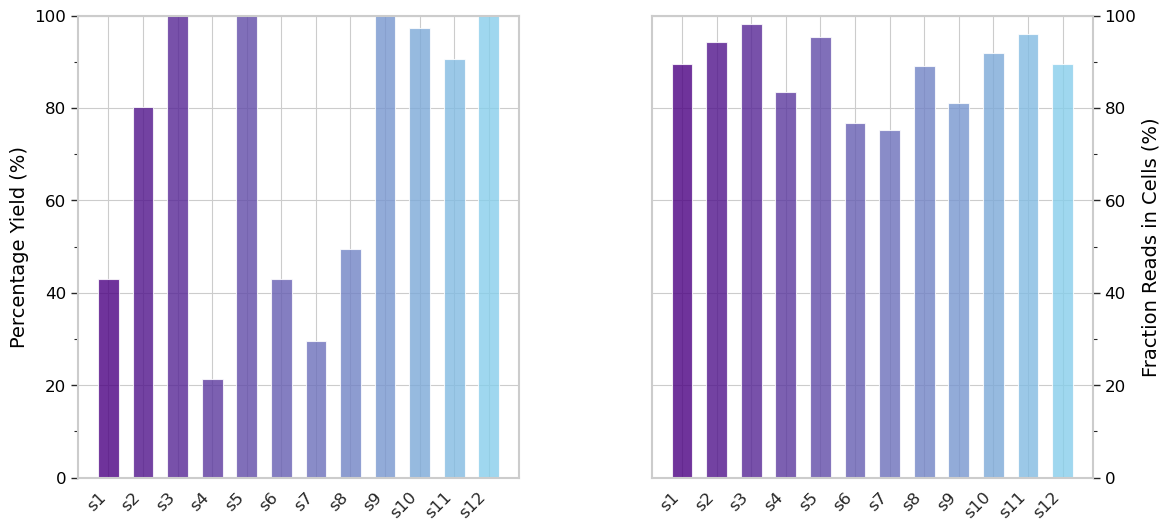

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set the style for a publication-quality plot
sns.set(style="whitegrid", context="paper", font_scale=1.5)
plt.rcParams['font.family'] = 'Arial'  # Use a professional font
plt.rcParams['axes.linewidth'] = 1.5   # Thicker axis lines

# Define the file path (expand the tilde to the user's home directory)
file_path = os.path.expanduser('qc_cellranger_table_.csv')

# Load the CSV file with error handling
try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded {file_path}")
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Please check the path and try again.")
    exit()
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

# Select the required columns for plotting
plot_df = df[['sample_name', 'percentage_yield', 'fraction_reads_in_cells']]

# Ensure the data is numeric and handle any potential issues
plot_df['percentage_yield'] = pd.to_numeric(plot_df['percentage_yield'], errors='coerce')
plot_df['fraction_reads_in_cells'] = pd.to_numeric(plot_df['fraction_reads_in_cells'], errors='coerce')

# Drop any rows with NaN values (if conversion failed)
plot_df = plot_df.dropna()

# Create a color gradient from purple (#4B0082) to bright sky blue (#87CEEB)
n_samples = len(plot_df['sample_name'])
colors = sns.color_palette("blend:#4B0082,#87CEEB", n_colors=n_samples)  # Gradient from purple to sky blue
sample_colors = dict(zip(plot_df['sample_name'], colors))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Set bar width to a skinnier value to reduce bar thickness
bar_width = 0.6  # Skinnier bars as requested

# X positions for the bars (one position per sample)
x = np.arange(len(plot_df['sample_name']))

# Plot 1: Percentage Yield (left subplot, y-axis on the left)
for i, sample in enumerate(plot_df['sample_name']):
    ax1.bar(x[i], plot_df[plot_df['sample_name'] == sample]['percentage_yield'], 
            width=bar_width, color=sample_colors[sample], alpha=0.8)

# Configure the left subplot (percentage_yield)
ax1.set_ylim(0, 100)  # Assumed range based on typical percentage data
ax1.set_ylabel('Percentage Yield (%)', fontsize=14, color='black')
# Set major ticks every 20 for labels on the left side only
ax1.set_yticks(np.arange(0, 101, 20))  # Labels at 0, 20, 40, ..., 100
# Set minor ticks every 10 (without labels) on the left side only
ax1.set_yticks(np.arange(0, 101, 10), minor=True)
ax1.tick_params(axis='y', which='major', labelcolor='black', labelsize=12)
ax1.tick_params(axis='y', which='minor', labelcolor='black', labelsize=0)  # Hide minor tick labels
ax1.yaxis.set_ticks_position('left')  # Ensure ticks are only on the left
ax1.set_xticks(x)
ax1.set_xticklabels(plot_df['sample_name'], rotation=45, ha='right', fontsize=12)  # Add sample names on x-axis

# Plot 2: Fraction Reads in Cells (right subplot, y-axis on the right)
for i, sample in enumerate(plot_df['sample_name']):
    ax2.bar(x[i], plot_df[plot_df['sample_name'] == sample]['fraction_reads_in_cells'], 
            width=bar_width, color=sample_colors[sample], alpha=0.8)

# Configure the right subplot (fraction_reads_in_cells)
ax2.set_ylim(0, 100)  # Assumed range based on typical percentage data
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylabel('Fraction Reads in Cells (%)', fontsize=14, color='black')
# Set major ticks every 20 for labels on the right side only
ax2.set_yticks(np.arange(0, 101, 20))  # Labels at 0, 20, 40, ..., 100
# Set minor ticks every 10 (without labels) on the right side only
ax2.set_yticks(np.arange(0, 101, 10), minor=True)
ax2.tick_params(axis='y', which='major', labelcolor='black', labelsize=12)
ax2.tick_params(axis='y', which='minor', labelcolor='black', labelsize=0)  # Hide minor tick labels
ax2.yaxis.set_ticks_position('right')  # Ensure ticks are only on the right
ax2.set_xticks(x)
ax2.set_xticklabels(plot_df['sample_name'], rotation=45, ha='right', fontsize=12)  # Add sample names on x-axis

# Remove all titles (shared and individual) as requested
# No suptitle or set_title calls here

# Adjust layout to prevent overlap
plt.subplots_adjust(right=0.85, wspace=0.3)

# Save the figure as a high-resolution image in the same directory as the CSV with DPI 600
output_path = os.path.join(os.path.dirname(file_path), 'qc_metrics_NK_barplots.png')
plt.savefig(output_path, dpi=600, bbox_inches='tight')
print(f"Plot saved as {output_path}")

# Show the plot
plt.show()